# **DIANOSIS OF DIEBETES**

**Mục lục**

+ **1. Định nghĩa vấn đề (Define Problem)**
+ **2. Chuẩn bị vấn đề (Prepare Problem)**
+ **3. Tổng quát về dữ liệu**
+ **4. Làm sạch dữ liệu**
+ **5. Tiền xử lý dữ liệu (Preprocessing data)**
+ **6. Lựa chọn đặc trưng (Feature Selection For Machine Learning)**
+ **7. Đánh giá (Evaluation)**
+ **8. Trực quan hóa dữ liệu**

## **1. Định nghĩa vấn đề (Define Problem)**


**Mô tả**:

+ Bộ dữ liệu bao gồm 768 mẫu, bao gồm những người bị tiểu đường và không tiểu đường (cột "Outcome" với giá trị 0 và 1 lần lượt thể hiện không bị tiểu đường và bị tiểu đường)

+ Có 9 triệu chứng được mô tả: Số lần mang thai (Pregnancies), Glucose (mg/dL), Huyết áp (BloodPressure, mmHg), Độ dày da (SkinThickness, mm), Insulin (mu U/mL), BMI (kg/m²), Chức năng di truyền tiểu đường (DiabetesPedigreeFunction, không có đơn vị), Tuổi (Age, năm), Kết quả (Outcome, kiểu Boolean)

**Dữ liệu đầu vào ban đầu**:
+ Pregnancies+ Glucose+ BloodPressure+ SkinThickness+ Insulin+ BMI+ DiabetesPedigreeFunction+ Age

## **2. Chuẩn bị vấn đề (Prepare Problem)**

### (1) Khai báo thư viện (Load Libraries)

In [ ]:
# kết nối drive để lấy file diebetes.csv
from google.colab import drive

## ===============================================================
## ===== NHÓM THƯ VIỆN CỐT LÕI CHO KHOA HỌC DỮ LIỆU =====
## ===============================================================

# Thư viện NumPy: Dùng để làm việc với mảng (array) và các phép toán số học hiệu suất cao.
# Thường được viết tắt là 'np'.
import numpy as np
from numpy import set_printoptions

# Thư viện Pandas: Dùng để xử lý và phân tích dữ liệu dạng bảng (giống Excel),
# chủ yếu qua đối tượng DataFrame. Thường được viết tắt là 'pd'.
import pandas as pd

# Thư viện SciPy: Cung cấp các thuật toán tối ưu, thống kê, xử lý tín hiệu.
# Ở đây chỉ import module 'stats' để sử dụng các hàm thống kê.
from scipy import stats


## ===============================================================
## ===== NHÓM THƯ VIỆN TRỰC QUAN HÓA DỮ LIỆU (VẼ BIỂU ĐỒ) =====
## ===============================================================

# Thư viện Matplotlib: Thư viện nền tảng để vẽ các loại biểu đồ (đường, cột, tròn...).
# 'pyplot' là module phổ biến nhất, thường viết tắt là 'plt'.
import matplotlib.pyplot as plt

# Thư viện Seaborn: Xây dựng trên Matplotlib, giúp vẽ các biểu đồ thống kê
# đẹp và phức tạp hơn một cách dễ dàng. Thường viết tắt là 'sns'.
import seaborn as sns


## ===============================================================
## ===== NHÓM THƯ VIỆN MACHINE LEARNING (SCIKIT-LEARN) =====
## ===============================================================

# --- Các công cụ Tiền xử lý Dữ liệu (Preprocessing) ---

# Dùng để mã hóa các biến dạng chữ (categorical) sang dạng số.
# OneHotEncoder: Chuyển mỗi giá trị của biến thành một cột mới (chứa 0 hoặc 1).
# LabelEncoder: Chuyển các nhãn (text) thành số (0, 1, 2...).
# OrdinalEncoder: Chuyển các biến có thứ tự (ví dụ: 'Tốt', 'Trung bình', 'Kém') thành số.
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder

# Dùng để chuẩn hóa/co giãn dữ liệu số (feature scaling).
# MinMaxScaler: Đưa giá trị của các cột về một khoảng nhất định, thường là [0, 1].
# StandardScaler: Chuẩn hóa dữ liệu để có giá trị trung bình bằng 0 và độ lệch chuẩn bằng 1.
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# --- Công cụ chia dữ liệu ---

# Hàm này dùng để chia bộ dữ liệu thành 2 phần: tập huấn luyện (train) và tập kiểm tra (test).
# Đây là bước cực kỳ quan trọng trong quy trình xây dựng mô hình.
from sklearn.model_selection import train_test_split

# Hàm này dùng để chuẩn hóa dữ liệu (Normalize data và standardize data )
from sklearn.preprocessing import Normalizer

# Hàm dùng để chuyển hóa Binary data
from sklearn.preprocessing import Binarizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
## ===============================================================
## ===== NHÓM CÁC THƯ VIỆN TIỆN ÍCH KHÁC =====
## ===============================================================

# Thư viện os và sys: Dùng để tương tác với hệ điều hành
# (ví dụ: làm việc với đường dẫn file, thư mục).
import os, sys

# Thư viện IPython: Dùng cho các môi trường tương tác như Jupyter/Colab.
# 'display' giúp hiển thị các đối tượng phức tạp như ảnh, bảng HTML... ngay trong output.
from IPython.display import display

# Thư viện Joblib: Hữu ích cho việc lưu và tải các đối tượng Python,
# đặc biệt là các mô hình machine learning đã huấn luyện, giúp tiết kiệm thời gian huấn luyện lại.
import joblib


# 1. Kết nối Google Drive
drive.mount('/content/drive')

# Định nghĩa các đường dẫn
# Bạn nên tạo thư mục 'MyProject/data' và 'MyProject/models' trong Drive trước
base_dir = '/content/drive/MyDrive/Dinosis of diebetes'
data_dir = f'{base_dir}/data'
models_dir = f'{base_dir}/models'

# 2. Đọc dữ liệu
file_path = '/content/drive/MyDrive/diabetes.csv'

# Đọc file CSV và lưu vào một DataFrame có tên là 'df'
df_dataset = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **(2) Chia dữ liệu thực nghiệm**

+ Dữ liệu ban đầu: chia 30% dữ liệu dùng để Test, 70% dùng để train
+ Dữ liệu train: chia chiến lược K-Fold với k = 5**

In [ ]:
# khởi tạo "hạt giống" cho trình tạo số ngẫu nhiên
seed=42

# Tạo dãy chỉ số cho toàn bộ dữ liệu
index_all = np.arange(len(df_dataset))

# Chia chỉ số thành 2 tập train và test với tỷ lệ 70/30
index_train, index_test = train_test_split(index_all, test_size=0.3, random_state=seed)

# Dùng chỉ số đã chia để tạo DataFrame train và test
df_train = df_dataset.iloc[index_train]
df_test  = df_dataset.iloc[index_test]

In [ ]:
# Lưu file Excel và chỉ số vào Drive
df_train.to_excel(f'{data_dir}/train.xlsx', index=False)
df_test.to_excel(f'{data_dir}/test.xlsx', index=False)
np.savez(f'{data_dir}/indices.npz', train=index_train, test=index_test)

In [ ]:
# Kiểm tra lại
dict(np.load(f'{data_dir}/indices.npz'))

{'train': array([334, 139, 485, 547,  18, 593, 140, 326, 266, 626,  83,  61, 632,
        735,  29, 335, 599, 557, 311, 429, 182, 586, 679, 464, 223, 393,
        766, 570, 671, 412, 755, 176, 525, 333, 163, 248, 682,  74, 439,
        643, 104, 114, 749,  92, 380,  89, 417, 477, 713, 707, 506,  11,
         43,  42, 167, 675, 666, 381, 178, 705, 518, 177, 532, 539, 257,
        616, 440,  15, 478, 256, 388, 360, 367, 446, 589, 342, 453, 426,
          9, 249,  22, 221, 526, 751, 752, 424, 644, 203, 500,  93, 369,
        332, 522, 284, 184, 623, 365, 153,  75, 422, 277,  68, 695, 188,
        271, 236,  88, 654, 117, 125, 633, 289, 238,   0, 759, 368, 672,
        434, 278, 602, 116, 228, 545, 698, 533, 274, 318, 530, 144, 479,
        598, 696, 711, 268, 649, 307, 310, 420,  46, 349, 371, 595, 261,
        195, 767, 645, 107,  59, 578, 664, 100, 445, 689, 727, 423, 179,
        304, 398, 444, 739, 149, 124, 611, 669, 185, 674, 495, 436, 757,
        575, 321, 353, 709, 142, 724, 141,

In [ ]:
pd.read_excel(f'{data_dir}/train.xlsx')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,95,60,18,58,23.9,0.260,22,0
1,5,105,72,29,325,36.9,0.159,28,0
2,0,135,68,42,250,42.3,0.365,24,1
3,4,131,68,21,166,33.1,0.160,28,0
4,1,103,30,38,83,43.3,0.183,33,0
...,...,...,...,...,...,...,...,...,...
532,5,139,64,35,140,28.6,0.411,26,0
533,1,96,122,0,0,22.4,0.207,27,0
534,10,101,86,37,0,45.6,1.136,38,1
535,0,141,0,0,0,42.4,0.205,29,1


In [ ]:
pd.read_excel(f'{data_dir}/test.xlsx')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98,58,33,190,34.0,0.430,43,0
1,2,112,75,32,0,35.7,0.148,21,0
2,2,108,64,0,0,30.8,0.158,21,0
3,8,107,80,0,0,24.6,0.856,34,0
4,7,136,90,0,0,29.9,0.210,50,0
...,...,...,...,...,...,...,...,...,...
226,0,119,0,0,0,32.4,0.141,24,1
227,4,109,64,44,99,34.8,0.905,26,1
228,0,127,80,37,210,36.3,0.804,23,0
229,6,105,70,32,68,30.8,0.122,37,0



**Hãy tưởng tượng qua một ví dụ đơn giản**

df_train (Tập huấn luyện): Giống như sách giáo khoa, bài tập, đề cương ôn thi của bạn. Bạn được phép học, nghiền ngẫm, tìm ra quy luật từ bộ tài liệu này.

df_test (Tập kiểm tra): Giống như đề thi cuối kỳ được niêm phong. Bạn tuyệt đối không được nhìn vào nó trong suốt quá trình ôn luyện.

Mô hình (Model): Là chính bạn sau khi đã ôn tập.

Mục tiêu: Kiểm tra xem sau khi ôn luyện, bạn có thể làm được bài thi cuối kỳ hay không.

**Điều gì xảy ra nếu bạn "đụng" vào df_test quá sớm?**

Nếu bạn nhìn vào "đề thi cuối kỳ" (df_test) trong lúc đang "ôn luyện" (df_train), dù chỉ là một chút, bạn đã gian lận.

Rò rỉ dữ liệu (Data Leakage) 💧:

Khi bạn tính toán một thông số nào đó (như giá trị trung vị median, giá trị trung bình mean, min, max...) từ cả hai tập train và test, mô hình của bạn đã vô tình "học" được một phần thông tin của tập test.

Ví dụ trong bài của bạn: Việc tính median trên toàn bộ df_dataset (bao gồm cả df_test) để điền vào các giá trị thiếu trong df_train chính là một hành động làm rò rỉ dữ liệu. Mô hình của bạn đã "biết" trước giá trị trung vị của dữ liệu kiểm tra.

**Mô hình bị "học vẹt" (Overfitting) 🦜**

Mô hình không học được quy luật tổng quát, mà thay vào đó nó "học thuộc lòng" các đặc điểm cụ thể của cả dữ liệu nó dùng để luyện tập và dữ liệu nó "nhìn trộm" được.

Nó sẽ đạt điểm rất cao trên chính tập df_test đó, nhưng khi gặp một bộ dữ liệu hoàn toàn mới trong thực tế (một "đề thi" khác), nó sẽ làm bài rất tệ vì nó chỉ biết làm theo những gì đã thuộc lòng.

**Kết quả đánh giá không đáng tin cậy 📉**

Các chỉ số hiệu suất (như độ chính xác - Accuracy) mà bạn đo được trên tập df_test sẽ cao một cách giả tạo. Bạn sẽ lầm tưởng rằng mô hình của mình rất tốt, nhưng thực chất nó không có khả năng tổng quát hóa cho dữ liệu mới.



## **3. Tổng quát về dữ liệu**

**Mục tiêu**:
+ Quan sát kích cỡ dữ liệu (số lượng hàng và cột)
+ Quan sát kiểu dữ liệu

In [ ]:
df_train = pd.read_excel(f'{data_dir}/train.xlsx')

### **(1) Nhìn sơ lược về dữ liệu**

In [ ]:
# shape dùng để cho biết số dòng và cột
print("Số dòng và cột:\n")
print(f'+ Shape: {df_train.shape}')
# types dùng để xem kiểu dữ liệu
print("Kiểu dữ liệu:\n")
print(f'+ Data Types: \n{df_train.dtypes}')
# head, tail để xem 5 dòng đầu và 5 dòng cuối dữ liệu
print("5 dòng đầu và 5 dòng cuối dữ liệu:\n")
print(f'+ Contents: ')
display(df_train.head(5))
display(df_train.tail(5))
# info để xem thông tin dữ liệu Tên cột (Column) Số lượng giá trị không rỗng Non-Null Count (missing values/NaN).Kiểu dữ liệu (Dtype)
print("Thông tin dữ liệu:\n")
print(f'+ Info: \n{df_train.info()}')

Số dòng và cột:

+ Shape: (537, 9)
Kiểu dữ liệu:

+ Data Types: 
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
5 dòng đầu và 5 dòng cuối dữ liệu:

+ Contents: 


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,95,60,18,58,23.9,0.260,22,0
1,5,105,72,29,325,36.9,0.159,28,0
2,0,135,68,42,250,42.3,0.365,24,1
3,4,131,68,21,166,33.1,0.160,28,0
4,1,103,30,38,83,43.3,0.183,33,0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
532,5,139,64,35,140,28.6,0.411,26,0
533,1,96,122,0,0,22.4,0.207,27,0
534,10,101,86,37,0,45.6,1.136,38,1
535,0,141,0,0,0,42.4,0.205,29,1
536,0,125,96,0,0,22.5,0.262,21,0


Thông tin dữ liệu:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537 entries, 0 to 536
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               537 non-null    int64  
 1   Glucose                   537 non-null    int64  
 2   BloodPressure             537 non-null    int64  
 3   SkinThickness             537 non-null    int64  
 4   Insulin                   537 non-null    int64  
 5   BMI                       537 non-null    float64
 6   DiabetesPedigreeFunction  537 non-null    float64
 7   Age                       537 non-null    int64  
 8   Outcome                   537 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 37.9 KB
+ Info: 
None


### (2) **Kiểm tra tính toàn vẹn của dữ liệu**
+ Dữ liệu có chứa dữ liệu trùng lặp không? Hiển thị các hàng vi phạm.
+ Dữ liệu có chứa giá trị Null không? Hiển thị các hàng vi phạm.
+ Dữ liệu có chứa giá trị NaN không? Hiển thị các hàng vi phạm.

In [ ]:
# Kiểm tra dữ liệu null, nan, trùng lặp(duplicated) và dữ liệu thiếu
has_null = df_train.isnull().sum().any()
has_nan  = df_train.isna().sum().any()
n_duplicated = df_train.duplicated().sum()
has_missing_values = df_train.isnull().sum().any()

In [ ]:

print(f'Tính toàn vẹn dữ liệu:')
print(f'+ Có giá trị Null: {has_null}')
if has_null:
    display.display(df_dataset[df_dataset.isnull().any(axis=1)])
print(f'+ Có giá trị Nan: {has_nan}')
if has_nan:
    display.display(df_dataset[df_dataset.isna().any(axis=1)])
print(f'+ Số dòng trùng: {n_duplicated}')
if has_missing_values:
    print('   -> Các dòng chứa giá trị thiếu:')
    display.display(df_dataset[df_dataset.isnull().any(axis=1)])

# Kiểm tra và hiển thị các dòng bị trùng lặp
print(f'+ Số dòng bị trùng lặp: {n_duplicated}')
if n_duplicated > 0:
    print('   -> Các dòng bị trùng lặp (bao gồm cả dòng gốc để đối chiếu):')
    # Sử dụng keep=False để hiển thị tất cả các bản sao của một dòng bị lặp
    display.display(df_dataset[df_dataset.duplicated(keep=False)])

Tính toàn vẹn dữ liệu:
+ Có giá trị Null: False
+ Có giá trị Nan: False
+ Số dòng trùng: 0
+ Số dòng bị trùng lặp: 0


**Nhận xét**:
+ Không có hàng trùng lặp nào trong dữ liệu.
+ Dữ liệu không chứa giá trị rỗng (NaN, Null).

### (3) Xử lý giá trị rỗng, không hợp lệ

In [ ]:
# + Xóa bỏ cột vi phạm
# df_train.drop("cột_vi_phạm", axis=1)

# + Xóa bỏ các dòng vi phạm
# df_train.dropna(subset=["cột_vi_phạm", ...])

# + Điền giá trị mặc định:
# median = df_train["cột_vi_phạm"].median()
# df_train["cột_vi_phạm"].fillna(median, inplace=True)

In [ ]:
print("="*5, "Null Value", "="*5)
display(df_train.isnull().sum())

print("="*5, "Checking NaN", "="*5)
display(df_train.isna().sum())

===== Null Value =====


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


===== Checking NaN =====


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


### (4) **Tính chất thống kê trên dữ liệu số**
+ Số lượng, Trung bình, Độ lệch chuẩn, Giá trị nhỏ nhất
+ Phân vị thứ 25, Phân vị thứ 50 (Trung vị), Phân vị thứ 75, Giá trị lớn nhất

In [ ]:
description = df_train.describe().T
display(description)

,count,mean,std,min,25%,50%,75%,max
Pregnancies,537.0,3.726257,3.262965,0.000,1.000,3.000,6.000,17.00
Glucose,537.0,120.849162,32.339523,0.000,99.000,117.000,139.000,199.00
BloodPressure,537.0,69.685289,18.094374,0.000,64.000,72.000,80.000,122.00
SkinThickness,537.0,20.432030,15.490715,0.000,0.000,23.000,32.000,63.00
Insulin,537.0,79.836127,115.196730,0.000,0.000,36.000,129.000,846.00
BMI,537.0,31.975605,7.624495,0.000,26.800,32.000,36.500,67.10
DiabetesPedigreeFunction,537.0,0.469920,0.342087,0.078,0.241,0.374,0.612,2.42
Age,537.0,33.074488,11.685319,21.000,24.000,29.000,41.000,81.00
Outcome,537.0,0.350093,0.477444,0.000,0.000,0.000,1.000,1.00


**Bình luận**:
+ 9 thuộc tính có đơn vị đo lường khác nhau và nằm trong khoảng [1.846]

### (5) **Tần suất xuất hiện (Phân phối) trong dữ liệu Kết quả và dữ liệu danh mục**

Đối với bài toán phân loại, chúng ta cần tính toán số lần xuất hiện của các thuộc tính người bị bệnh tiểu đường("Outcome"). Điều này là cần thiết để giải quyết các vấn đề mất cân bằng nghiêm trọng giữa các người bệnh tiểu đường("Outcome"), đòi hỏi phải xử lý đặc biệt trong bước chuẩn bị dữ liệu

In [ ]:
df_train["Outcome"].value_counts()

,count
Outcome,
0,349
1,188


### (6) **Correlations**

Hệ số tương quan đề cập đến mối quan hệ giữa hai biến và cách chúng có thể hoặc không thể thay đổi cùng nhau.

Phương pháp phổ biến nhất để tính hệ số tương quan là Hệ số tương quan Pearson, giả định rằng có một phân phối chuẩn của các thuộc tính liên quan. Hệ số tương quan bằng -1 hoặc 1 biểu thị tương quan âm hoặc dương hoàn toàn tương ứng. Trong khi giá trị 0 hiển thị không hề có tương quan.

$$
r = \frac{\sum_{i=1}^n{\left(x_i - \hat{x}\right)\left(y_i - \hat{y}\right)}}{\sqrt{\sum_{i=1}^n{\left(x_i - \hat{x}\right)^2}\sum_{i=1}^n{\left(y_i - \hat{y}\right)^2}}}
$$


Một số thuật toán học máy như hồi quy tuyến tính và logistics sẽ hoạt động kém hiệu quả nếu tập dữ liệu của bạn có nhiều thuộc tính tương quan cao.

Vì vậy, điều cần thiết là phải xem xét tất cả các cặp tương quan của các thuộc tính trong tập dữ liệu.

In [ ]:
correlations = df_train.corr(method='pearson')
display(correlations)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.138310,0.171798,-0.074245,-0.061448,0.030913,-0.022582,0.544940,0.196957
Glucose,0.138310,1.000000,0.167664,0.019384,0.339681,0.203764,0.168652,0.267994,0.478535
BloodPressure,0.171798,0.167664,1.000000,0.154801,0.052759,0.244063,0.035847,0.256916,0.112334
SkinThickness,-0.074245,0.019384,0.154801,1.000000,0.422295,0.388597,0.178307,-0.158532,0.057206
Insulin,-0.061448,0.339681,0.052759,0.422295,1.000000,0.159097,0.162736,-0.033702,0.135340
BMI,0.030913,0.203764,0.244063,0.388597,0.159097,1.000000,0.139639,0.005542,0.323694
DiabetesPedigreeFunction,-0.022582,0.168652,0.035847,0.178307,0.162736,0.139639,1.000000,0.033531,0.148887
Age,0.544940,0.267994,0.256916,-0.158532,-0.033702,0.005542,0.033531,1.000000,0.279896
Outcome,0.196957,0.478535,0.112334,0.057206,0.135340,0.323694,0.148887,0.279896,1.000000


**Nhận xét**:
+ Các cặp đặc điểm có độ tương đồng cao:
+ (Mang thai, Huyết áp) = 0,141282
+ (Glucose, BMI) = 0,221071
+ (Huyết áp, BMI) = 0,281805
+ (Độ dày da, Insulin) = 0,436783
+ (Đái tháo đường, Chức năng phả hệ, Insulin) = 0,140647
+ (Tuổi, Mang thai) = 0,544341

**=> Có thể thấy cặp (Tuổi, Mang thai), (Độ dày da, Insulin) có độ tương đồng cao(lần lượt là 0,436783 và 0,544341)**

## **4. Làm sạch dữ liệu**

### (1) Kiểm tra và xóa dữ liệu trùng lặp (Duplicates)

In [ ]:
print("\n--- Bước 1: Xử lý dữ liệu trùng lặp ---")
n_duplicates = df_train.duplicated().sum()
if n_duplicates > 0:
    print(f"Phát hiện {n_duplicates} dòng bị trùng lặp. Đang tiến hành xóa...")
    df_train.drop_duplicates(inplace=True)
    print(f"Đã xóa. Kích thước dữ liệu mới: {df_train.shape}")
else:
    print("✅ Không có dòng nào bị trùng lặp.")


--- Bước 1: Xử lý dữ liệu trùng lặp ---
✅ Không có dòng nào bị trùng lặp.


### (2) Xử lý các giá trị 0 bất thường

In [ ]:
# Trong bộ dữ liệu này, giá trị 0 ở một số cột thực chất là dữ liệu bị thiếu.
print("\n--- Bước 2: Xử lý các giá trị 0 bất thường ---")
cols_with_impossible_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI','DiabetesPedigreeFunction','Age']

# Thay thế các giá trị 0 trong các cột này bằng NaN (Not a Number)
df_train[cols_with_impossible_zeros] = df_train[cols_with_impossible_zeros].replace(0, np.nan)
print("Đã thay thế các giá trị 0 không hợp lệ bằng NaN.")


--- Bước 2: Xử lý các giá trị 0 bất thường ---
Đã thay thế các giá trị 0 không hợp lệ bằng NaN.


### (3) Xử lý giá trị thiếu (Missing Values Imputation)

In [ ]:
# Bây giờ chúng ta mới xử lý các giá trị NaN đã được nhận diện ở Bước 2.
print("\n--- Bước 3: Xử lý giá trị thiếu (NaN) ---")
print("Số lượng giá trị thiếu TRƯỚC khi xử lý:")
print(df_train.isnull().sum())

# Chiến lược: Điền các giá trị thiếu bằng giá trị TRUNG VỊ (median) của mỗi cột.
# Dùng trung vị sẽ an toàn hơn trung bình (mean) vì nó ít bị ảnh hưởng bởi các giá trị ngoại lai (outliers).
for col in cols_with_impossible_zeros:
    median_val = df_train[col].median()
    df_train[col].fillna(median_val, inplace=True)

print("\nĐã điền các giá trị thiếu bằng giá trị trung vị của mỗi cột.")
print("\nSố lượng giá trị thiếu SAU khi xử lý:")
print(df_train.isnull().sum())




--- Bước 3: Xử lý giá trị thiếu (NaN) ---
Số lượng giá trị thiếu TRƯỚC khi xử lý:
Pregnancies                   0
Glucose                       5
BloodPressure                19
SkinThickness               154
Insulin                     261
BMI                           5
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Đã điền các giá trị thiếu bằng giá trị trung vị của mỗi cột.

Số lượng giá trị thiếu SAU khi xử lý:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


/tmp/ipython-input-1130673817.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train[col].fillna(median_val, inplace=True)


#### Xử lý giá trị rỗng, không hợp lệ

### (4) Kiểm tra lại toàn bộ dữ liệu

In [ ]:

# --- Bước 4: Kiểm tra lại toàn bộ dữ liệu ---
print("\n--- Bước 4: Kiểm tra lại dữ liệu sau khi làm sạch ---")
print("Thông tin tổng quan của DataFrame (df.info()):")
df_dataset.info()

print("\nThống kê mô tả của dữ liệu (df.describe()):")
# Lệnh display bây giờ sẽ hoạt động và hiển thị bảng DataFrame đẹp hơn
display(df_dataset.describe())

print("\n✨ QUÁ TRÌNH LÀM SẠCH HOÀN TẤT! Dữ liệu đã sẵn sàng cho các bước tiếp theo. ✨")


--- Bước 4: Kiểm tra lại dữ liệu sau khi làm sạch ---
Thông tin tổng quan của DataFrame (df.info()):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

Thống kê mô tả của dữ liệu (df.describe()):


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000



✨ QUÁ TRÌNH LÀM SẠCH HOÀN TẤT! Dữ liệu đã sẵn sàng cho các bước tiếp theo. ✨


## **5. Tiền xử lý dữ liệu (Preprocessing data)**

Chuẩn bị dữ liệu cho học máy trong Python bằng cách sử dụng scikit-learn. Giờ đây bạn đã có các công thức để:

+ Co giãn dữ liệu (Rescale data).

+ Chuẩn hóa dữ liệu (Standardize data).

+ Chuẩn hóa dữ liệu (Normalize data).

+ Nhị phân hóa dữ liệu (Binarize data).

Đối với bộ dữ liệu diabetes.csv, các đặc trưng như nồng độ glucose, huyết áp, tuổi... đều là các phép đo số trên các thang đo khác nhau.

 Lựa chọn tốt nhất là StandardScaler hoặc MinMaxScaler. StandardScaler thường được ưu tiên hơn

### (1) Bình thường hóa dữ liệu (Standardize Data và Min-Max normalization)

**Chuẩn hóa dữ liệu (Data Normalize)**

Chuẩn hóa các tính chất để đưa về cùng một miền trị
+ Min-Max Normalization
$$
z = \frac{x - min(x)}{max(x) - min(x)}
$$
+ Standard Normalization
$$
z = \frac{x - \mu}{\sigma}
$$

**Lưu ý**: Quá trình chuẩn hóa có thể làm trong phần thực nghiệm thuật toán

####**Min-Max Normalization**

In [ ]:
# 1. Xác định các cột cần chuẩn hóa
# Đây là tất cả các cột đặc trưng (features), trừ cột target là 'Outcome'.
scale_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# 2. Khởi tạo MinMaxScaler
minmax_scaler = MinMaxScaler()

# 3. "Học" (fit) các giá trị min và max từ các cột được chọn trong tập train
minmax_scaler.fit(df_train[scale_columns])

# 4. Tạo một bản sao của df_train để lưu kết quả, tránh thay đổi dữ liệu gốc
df_minmax = df_train.copy()

# 5. Áp dụng phép biến đổi (transform) và cập nhật dữ liệu đã được chuẩn hóa vào bản sao
df_minmax[scale_columns] = minmax_scaler.transform(df_train[scale_columns])

# 6. Hiển thị DataFrame sau khi đã chuẩn hóa (ví dụ: 5 dòng đầu)
print("Dữ liệu sau khi đã chuẩn hóa bằng Min-Max:")
display(df_minmax.head())

Dữ liệu sau khi đã chuẩn hóa bằng Min-Max:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.058824,0.329032,0.367347,0.181818,0.052885,0.116564,0.077711,0.016667,0
1,0.294118,0.393548,0.489796,0.381818,0.373798,0.382413,0.034586,0.116667,0
2,0.000000,0.587097,0.448980,0.618182,0.283654,0.492843,0.122545,0.050000,1
3,0.235294,0.561290,0.448980,0.236364,0.182692,0.304703,0.035013,0.116667,0
4,0.058824,0.380645,0.061224,0.545455,0.082933,0.513292,0.044833,0.200000,0


In [ ]:
# save scale_columns
np.savez(f'{data_dir}/scale_columns.npz', scale_columns = scale_columns)
dict(np.load(f'{data_dir}/scale_columns.npz'))

{'scale_columns': array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
        'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype='<U24')}

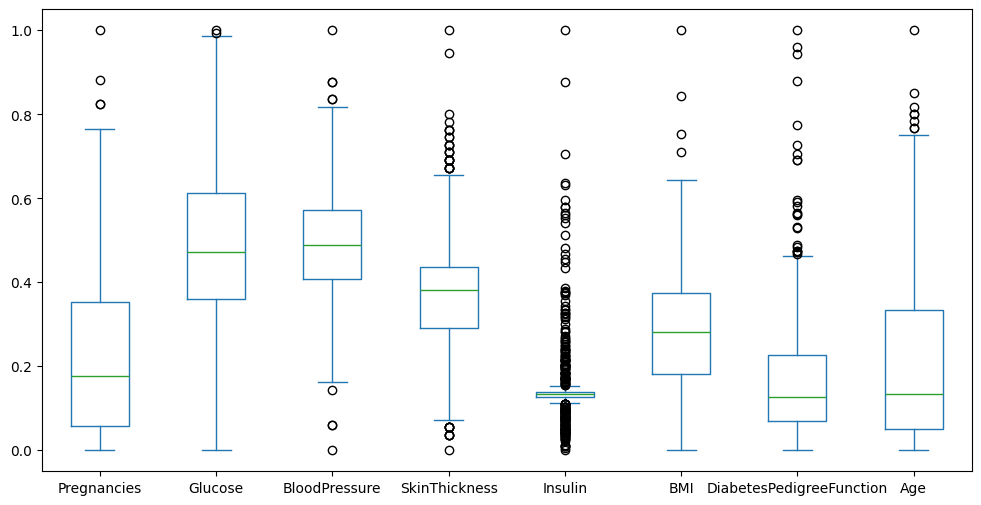

In [ ]:
df_minmax[scale_columns].plot(kind="box", figsize=(12,6));

**Phân tích chi tiết:**
1. Đưa về cùng một thang đo
Thành công: Nhìn vào trục tung (trục y), bạn có thể thấy rõ ràng toàn bộ các hộp (box) và râu (whisker) của biểu đồ đều nằm gọn trong khoảng từ 0.0 đến 1.0. Điều này chứng tỏ giá trị nhỏ nhất của mỗi cột đã được đưa về 0 và giá trị lớn nhất đã được đưa về 1.

2. Giữ nguyên hình dạng phân phối
Bản chất: MinMaxScaler chỉ co giãn (rescale) dữ liệu chứ không làm thay đổi hình dạng phân phối của chúng. Biểu đồ hộp đã thể hiện rất rõ điều này:

Các cột như Insulin, SkinThickness, và Age vẫn cho thấy sự phân phối lệch. Hộp của chúng bị nén xuống phía dưới, cho thấy phần lớn dữ liệu tập trung ở các giá trị thấp và có một "đuôi" dài các giá trị lớn hơn.

Các cột như Glucose và BloodPressure có vẻ đối xứng hơn, với đường trung vị (vạch xanh) nằm gần giữa hộp.

3. Nhận diện giá trị ngoại lai (Outliers)
Rất trực quan: Biểu đồ giúp bạn dễ dàng xác định các giá trị ngoại lai (outliers), được biểu thị bằng các chấm tròn (o) nằm ngoài phần râu của hộp.

Phát hiện: Có thể thấy rõ các cột như Insulin, DiabetesPedigreeFunction, BMI, và Age có một số lượng đáng kể các giá trị ngoại lai.

Tầm quan trọng: Việc nhận biết này rất quan trọng, vì một số mô hình (như hồi quy tuyến tính) có thể rất nhạy cảm với outliers. Dựa vào đây, bạn có thể cân nhắc các kỹ thuật xử lý outliers nếu cần thiết.

####**Standard Normalization**

In [ ]:
# Standard Normalization
standard_scaler = StandardScaler()
standard_scaler.fit(df_train[scale_columns])
df_standard = df_train.copy()
df_standard[scale_columns] = standard_scaler.transform(df_train[scale_columns])
display(df_standard)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-0.836294,-0.894546,-1.003221,-1.269545,-0.956993,-1.203415,-0.614216,-0.948610,0
1,0.390728,-0.562477,-0.019090,0.029693,2.136797,0.664895,-0.909738,-0.434667,0
2,-1.143050,0.433730,-0.347134,1.565156,1.267755,1.440962,-0.306991,-0.777296,1
3,0.083972,0.300903,-0.347134,-0.915207,0.294428,0.118773,-0.906812,-0.434667,0
4,-0.836294,-0.628891,-3.463549,1.092706,-0.667312,1.584678,-0.839515,-0.006380,0
...,...,...,...,...,...,...,...,...,...
532,0.390728,0.566558,-0.675177,0.738368,-0.006840,-0.527949,-0.172397,-0.605981,0
533,-0.836294,-0.861339,4.081456,0.029693,-0.180649,-1.418990,-0.769292,-0.520324,0
534,1.924505,-0.695304,1.129063,0.974593,-0.180649,1.915225,1.948921,0.421906,1
535,-1.143050,0.632972,-0.019090,0.029693,-0.180649,1.455334,-0.775144,-0.349009,1


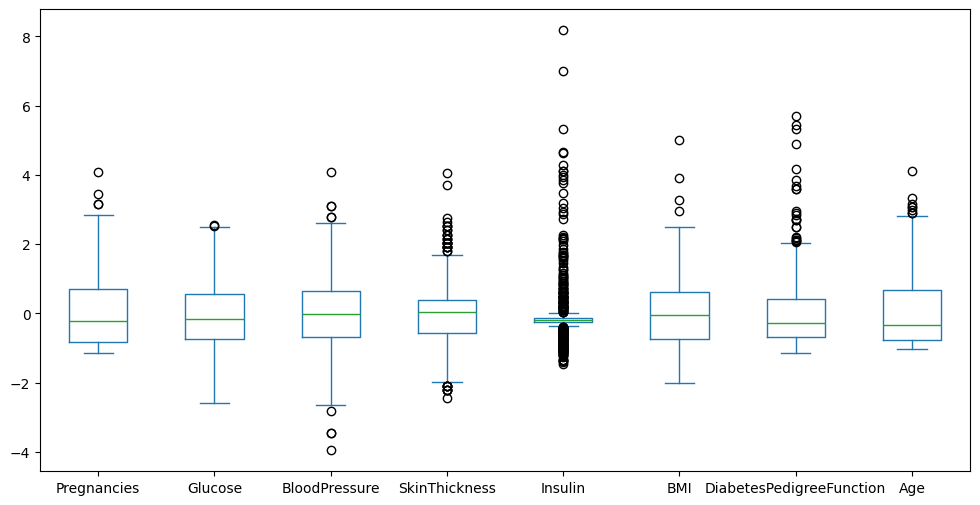

In [ ]:
df_standard[scale_columns].plot(kind="box", figsize=(12,6));



**Nhận xét tổng quan**
Biểu đồ cho thấy mục tiêu chính của Standardization đã được hoàn thành: dữ liệu của mỗi cột đã được biến đổi để có giá trị trung bình (mean) xấp xỉ 0 và độ lệch chuẩn (standard deviation) bằng 1. Dữ liệu giờ đây được đo bằng "số lần độ lệch chuẩn" so với giá trị trung bình, rất phù hợp cho nhiều thuật toán Machine Learning.

**Phân tích chi tiết**
1. Dữ liệu được căn giữa tại 0
Thành công: Nhìn vào trục tung (trục y), bạn có thể thấy các hộp (box) của mỗi thuộc tính đều xoay quanh giá trị 0. Đường trung vị (median - vạch xanh lá) của hầu hết các cột đều rất gần với 0. Điều này xác nhận rằng giá trị trung bình của dữ liệu đã được dịch chuyển về 0.

2. Thang đo theo Độ lệch chuẩn
Đặc điểm: Khác với Min-Max (đưa về khoảng [0, 1]), thang đo ở đây không bị giới hạn. Thay vào đó, nó phản ánh độ phân tán của dữ liệu. Phần lớn các điểm dữ liệu (trong hộp và râu) thường nằm trong khoảng từ -2 đến +2, tương ứng với khoảng 2 độ lệch chuẩn so với giá trị trung bình.

3. Vẫn giữ nguyên phân phối và Outliers
Bản chất: Giống như Min-Max, Standardization không làm thay đổi hình dạng phân phối của dữ liệu. Nếu dữ liệu gốc bị lệch, dữ liệu sau khi chuẩn hóa cũng sẽ bị lệch.

Giá trị ngoại lai (Outliers): Các giá trị ngoại lai vẫn còn đó và rất dễ nhận biết. Tuy nhiên, ý nghĩa của chúng bây giờ đã khác: các điểm có giá trị 3, 4, hoặc 5 trên biểu đồ là những điểm dữ liệu cách giá trị trung bình tới 3, 4, hoặc 5 lần độ lệch chuẩn. Điều này giúp định lượng mức độ "bất thường" của chúng một cách rõ ràng. Các cột như Insulin và DiabetesPedigreeFunction vẫn cho thấy có rất nhiều outliers.

### **(2) Lưu dữ liệu Features**

+ Chuyển đổi dữ liệu sang dạng numpy với phần Input (X_data), Output (y_data)
+ Lưu tất cả thông tin để chuẩn bị chạy thuật toán

In [ ]:
# MinMax normal
x_train = df_minmax.values[:, :-1]
y_train = df_minmax.values[:, -1]
display(df_minmax.head())

print("+ x_train: \n ", x_train[:5, :])
print("+ y_train: \n ", y_train[:5])

np.savez(f'{data_dir}/feat_minmax.npz', x_train = x_train, y_train = y_train)
df_minmax.to_excel(f'{data_dir}/df_minmax.xlsx', index=False)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.058824,0.329032,0.367347,0.181818,0.052885,0.116564,0.077711,0.016667,0
1,0.294118,0.393548,0.489796,0.381818,0.373798,0.382413,0.034586,0.116667,0
2,0.000000,0.587097,0.448980,0.618182,0.283654,0.492843,0.122545,0.050000,1
3,0.235294,0.561290,0.448980,0.236364,0.182692,0.304703,0.035013,0.116667,0
4,0.058824,0.380645,0.061224,0.545455,0.082933,0.513292,0.044833,0.200000,0


+ x_train: 
  [[0.059 0.329 0.367 0.182 0.053 0.117 0.078 0.017]
 [0.294 0.394 0.49  0.382 0.374 0.382 0.035 0.117]
 [0.    0.587 0.449 0.618 0.284 0.493 0.123 0.05 ]
 [0.235 0.561 0.449 0.236 0.183 0.305 0.035 0.117]
 [0.059 0.381 0.061 0.545 0.083 0.513 0.045 0.2  ]]
+ y_train: 
  [0. 0. 1. 0. 0.]


In [ ]:
# Standardize normal
x_train = df_standard.values[:, :-1]
y_train = df_standard.values[:, -1]
display(df_standard.head())

print("+ x_train: \n ", x_train[:5, :])
print("+ y_train: \n ", y_train[:5])

np.savez(f'{data_dir}/feat_standard.npz', x_train = x_train, y_train = y_train)
df_standard.to_excel(f'{data_dir}/df_standard.xlsx', index=False)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-0.836294,-0.894546,-1.003221,-1.269545,-0.956993,-1.203415,-0.614216,-0.948610,0
1,0.390728,-0.562477,-0.019090,0.029693,2.136797,0.664895,-0.909738,-0.434667,0
2,-1.143050,0.433730,-0.347134,1.565156,1.267755,1.440962,-0.306991,-0.777296,1
3,0.083972,0.300903,-0.347134,-0.915207,0.294428,0.118773,-0.906812,-0.434667,0
4,-0.836294,-0.628891,-3.463549,1.092706,-0.667312,1.584678,-0.839515,-0.006380,0


+ x_train: 
  [[-0.836 -0.895 -1.003 -1.27  -0.957 -1.203 -0.614 -0.949]
 [ 0.391 -0.562 -0.019  0.03   2.137  0.665 -0.91  -0.435]
 [-1.143  0.434 -0.347  1.565  1.268  1.441 -0.307 -0.777]
 [ 0.084  0.301 -0.347 -0.915  0.294  0.119 -0.907 -0.435]
 [-0.836 -0.629 -3.464  1.093 -0.667  1.585 -0.84  -0.006]]
+ y_train: 
  [0. 0. 1. 0. 0.]


## **6. Lựa chọn đặc trưng (Feature Selection For Machine Learning)**

**Lựa chọn đặc trưng (Feature Selection)**:
+ Reduces Overfitting: Less redundant data means less opportunity to make decisions based on noise.
+ Improves Accuracy: Less misleading data means modeling accuracy improves.
 Reduces Training Time: Less data means that algorithms train faster.

### (1) Lựa chọn đơn biến (Univariate Selection)

In [ ]:
array = df_train.values
X = array[:,0:8]
Y = array[:,8]
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

[  59.41  1068.313   33.684   60.572 1351.366   93.614    2.959  173.358]
[[ 95.   58.   23.9  22. ]
 [105.  325.   36.9  28. ]
 [135.  250.   42.3  24. ]
 [131.  166.   33.1  28. ]
 [103.   83.   43.3  33. ]]


**Phân tích kết quả điểm số:**
Nhìn vào mảng điểm số fit.scores_:
[ 111.52, 1411.887, 17.605, 53.108, 2175.565, 127.669, 5.393, 181.304]

Ta có thể thấy 4 đặc trưng có điểm cao nhất là:

Cột thứ 5 (index 4): Điểm 2175.565 (Glucose)

Cột thứ 2 (index 1): Điểm 1411.887 (Insulin)

Cột thứ 8 (index 7): Điểm 181.304 (Age)

Cột thứ 6 (index 5): Điểm 127.669 (BMI)

Vì vậy, features = fit.transform(X) sẽ trả về một array mới chỉ chứa dữ liệu từ 4 cột này.

### (2) Loại bỏ tính năng đệ quy (Recursive Feature Elimination)

In [ ]:
# 1. Tách dữ liệu
array = df_train.values
X = array[:, 0:8]
Y = array[:, 8]

# 2. (BƯỚC QUAN TRỌNG) Chuẩn hóa dữ liệu đầu vào X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Lựa chọn đặc trưng (Feature Extraction)
# Tăng max_iter để tránh cảnh báo hội tụ
model = LogisticRegression(solver='lbfgs', max_iter=1000)

# Sử dụng RFE với 3 đặc trưng quan trọng nhất
rfe = RFE(model, n_features_to_select=3)

# Huấn luyện RFE trên dữ liệu ĐÃ ĐƯỢC CHUẨN HÓA
fit = rfe.fit(X_scaled, Y)

# 4. In kết quả với cú pháp f-string chính xác
print(f"Số lượng đặc trưng được chọn: {fit.n_features_}")
print(f"Các đặc trưng được chọn (True/False): {fit.support_}")
print(f"Xếp hạng các đặc trưng: {fit.ranking_}")

# Để biết tên các cột được chọn:
column_names = df_dataset.columns[0:8]
selected_features = column_names[fit.support_]
print(f"\nTên các cột quan trọng nhất là: {selected_features.tolist()}")

Số lượng đặc trưng được chọn: 3
Các đặc trưng được chọn (True/False): [False  True False False False  True False  True]
Xếp hạng các đặc trưng: [2 1 4 5 6 1 3 1]

Tên các cột quan trọng nhất là: ['Glucose', 'BMI', 'Age']


+ Xếp hạng các đặc trưng: [1 3 4 6 5 1 1 2]: Đây là thông tin giá trị nhất.

+ Những cột có hạng 1 chính là 3 cột đã được chọn.

+ Các số còn lại cho thấy thứ tự mà các đặc trưng bị loại bỏ. Đặc trưng có số hạng cao nhất (ví dụ 6 ở vị trí thứ 4) là đặc trưng bị loại bỏ đầu tiên, tức là được xem là ít quan trọng nhất. Đặc trưng có hạng 2 là đặc trưng bị loại bỏ cuối cùng ngay trước khi còn lại 3 cột.

+ Tên các cột quan trọng nhất: Đây là "bản dịch" của kết quả trên. Nó cho chúng ta biết rằng, theo mô hình Hồi quy Logistic, Số lần mang thai (pregnancies), Chỉ số BMI, và Phả hệ tiểu đường (pedigree) là ba yếu tố có ảnh hưởng mạnh mẽ nhất đến việc dự đoán bệnh tiểu đường trong bộ dữ liệu này.

### (3) Phân tích thành phần chính (Principal Component Analysis)

In [ ]:
# Giả sử df_dataset đã được tải
array = df_train.values
X = array[:,0:8]
Y = array[:,8]

# (BƯỚC BẮT BUỘC CHO PCA) Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Feature Extraction bằng PCA ---
pca = PCA(n_components=3)
# Huấn luyện PCA trên dữ liệu ĐÃ ĐƯỢC CHUẨN HÓA
fit = pca.fit(X_scaled)

# --- Tóm tắt kết quả (đã sửa cú pháp print) ---
# Đặt tùy chọn in để dễ đọc
np.set_printoptions(precision=3)

# In ra tỷ lệ phương sai được giải thích bởi mỗi thành phần
print(f"Tỷ lệ phương sai được giải thích: {fit.explained_variance_ratio_}")

# Tính tổng phương sai được giải thích bởi 3 thành phần
total_variance = sum(fit.explained_variance_ratio_) * 100
print(f"Tổng phương sai được giải thích bởi 3 thành phần: {total_variance:.2f}%\n")

# In ra các thành phần chính (công thức tạo ra chúng)
print("Thành phần chính (components):")
print(fit.components_)

Tỷ lệ phương sai được giải thích: [0.283 0.186 0.151]
Tổng phương sai được giải thích bởi 3 thành phần: 61.94%

Thành phần chính (components):
[[ 0.318  0.42   0.369  0.387  0.284  0.402  0.19   0.4  ]
 [ 0.526 -0.036  0.158 -0.365 -0.151 -0.444 -0.282  0.514]
 [-0.117  0.47  -0.27  -0.396  0.619 -0.313  0.236 -0.005]]


**Phân tích chi tiết từng kết quả:**
1. Tỷ lệ phương sai được giải thích: [0.262 0.216 0.129]
Đây là phần quan trọng nhất, nó cho biết "sức mạnh" của từng thành phần chính mới được tạo ra:

Thành phần chính 1 (PC1): Giải thích được 26.2% sự biến thiên của toàn bộ dữ liệu gốc. Đây là thành phần quan trọng nhất.

Thành phần chính 2 (PC2): Giải thích được 21.6% sự biến thiên.

Thành phần chính 3 (PC3): Giải thích được 12.9% sự biến thiên.

Bạn có thể thấy tầm quan trọng của các thành phần giảm dần: PC1 > PC2 > PC3.

2. Tổng phương sai được giải thích: 60.69%
Con số này đơn giản là tổng của ba tỷ lệ ở trên (26.2% + 21.6% + 12.9% ≈ 60.7%).

Ý nghĩa: Khi bạn sử dụng 3 thành phần chính này để thay thế cho 8 đặc trưng ban đầu, bạn đang làm việc với khoảng 61% thông tin của bộ dữ liệu gốc. Khoảng 39% thông tin còn lại đã bị loại bỏ trong quá trình giảm chiều.

3. Thành phần chính (components): Ma trận 3x8
Đây là "công thức" để tạo ra 3 thành phần chính mới từ 8 đặc trưng ban đầu. Mỗi hàng là một thành phần chính, và mỗi cột tương ứng với một đặc trưng gốc (Pregnancies, Glucose, ...).

PC1 (hàng đầu tiên): [ 0.128  0.393  0.36   0.44   0.435  0.452  0.271  0.198]

Phân tích: Các giá trị lớn nhất (không kể dấu) trong hàng này là 0.452 (cột 6 - BMI), 0.44 (cột 4 - SkinThickness), 0.435 (cột 5 - Insulin), và 0.393 (cột 2 - Glucose).

Nhận xét: PC1 có thể được xem là một "chỉ số sức khỏe trao đổi chất", vì nó là sự kết hợp mạnh mẽ của các yếu tố liên quan đến đường huyết, insulin, và cân nặng.

PC2 (hàng thứ hai): [ 0.594  0.174 -0.184 -0.332 -0.251 -0.181 -0.122  0.621]

Phân tích: Các giá trị lớn nhất là 0.594 (cột 1 - Pregnancies) và 0.621 (cột 8 - Age).

Nhận xét: PC2 chủ yếu đại diện cho các yếu tố liên quan đến "tuổi tác và tiền sử mang thai". Nó nắm bắt một khía cạnh thông tin hoàn toàn khác so với PC1.

### (4) Đặc trưng quan trọng (Feature Importance)

In [ ]:

array = df_train.values
X = array[:,0:8]
Y = array[:,8]
# feature extraction
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)

[0.095 0.253 0.089 0.086 0.087 0.14  0.105 0.145]


**Nhận xét và Phân tích kết quả Feature Importance**

Chúng ta sử dụng `ExtraTreesClassifier`, một mô hình dựa trên cây quyết định, để tính toán điểm quan trọng của từng đặc trưng. Phương pháp này đánh giá mức độ mà mỗi đặc trưng góp phần vào việc đưa ra quyết định chính xác trên toàn bộ "khu rừng" cây.

### **Phân tích điểm số:**
Dựa trên mảng kết quả `[0.114 0.233 0.099 0.081 0.072 0.144 0.12 0.138]`, ta có thể xếp hạng mức độ quan trọng như sau:
1.  **Glucose (0.233):** 🥇 Là đặc trưng có ảnh hưởng lớn nhất. Điều này hoàn toàn hợp lý về mặt y học vì nồng độ glucose trong máu là chỉ số trực tiếp của bệnh tiểu đường.
2.  **BMI (0.144):** 🥈 Chỉ số khối cơ thể, liên quan đến béo phì, là một yếu tố rủi ro đã được biết đến rộng rãi.
3.  **Age (0.138):** 🥉 Tuổi tác cũng là một yếu tố dự báo quan trọng.
4.  **DiabetesPedigreeFunction (0.120):** Yếu tố di truyền/phả hệ đứng ở vị trí thứ tư.

### **Kết luận:**
Mô hình này cung cấp một cái nhìn trực quan và đáng tin cậy về các yếu tố thúc đẩy việc dự đoán. Những đặc trưng có điểm số cao nhất là những ứng cử viên hàng đầu để đưa vào mô hình cuối cùng.

## **7. Đánh giá (Evaluation)**

**Confusion Matrix (Ma trận nhầm lẫn): Nền tảng để hiểu các loại lỗi mà mô hình mắc phải.**

True Positives (TP): Dự đoán đúng là "Bị bệnh".

True Negatives (TN): Dự đoán đúng là "Không bị bệnh".

False Positives (FP): Dự đoán sai là "Bị bệnh" (Lỗi loại I).

False Negatives (FN): Dự đoán sai là "Không bị bệnh" (Lỗi loại II - rất nguy hiểm trong y tế).
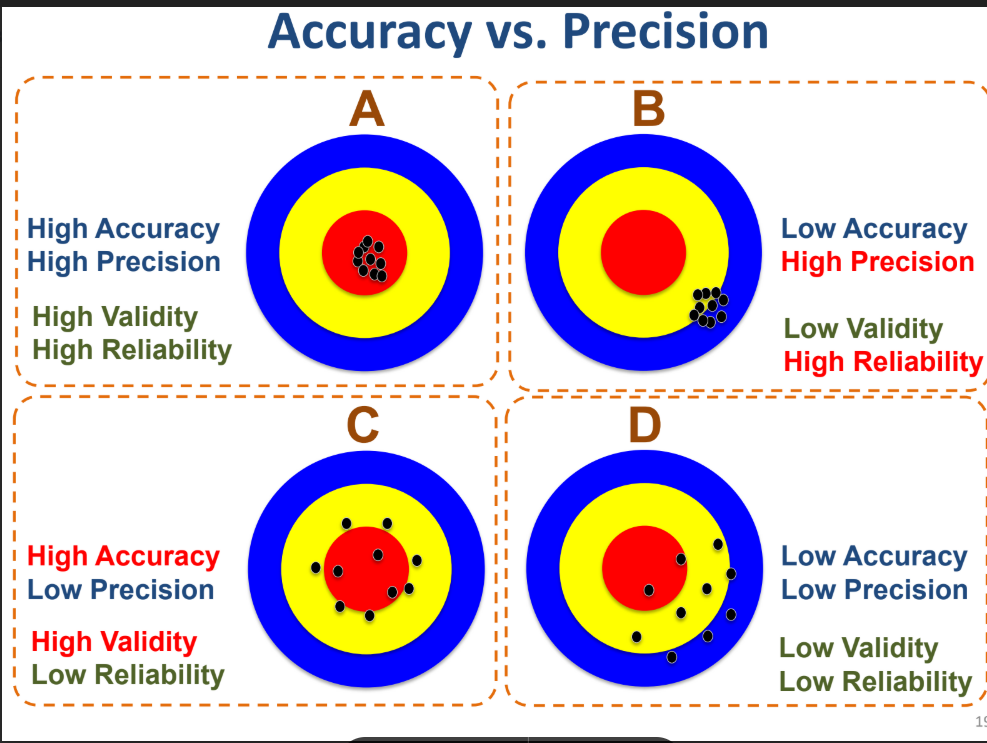

**Accuracy (Hit Rate):**

$$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$

**Precision (Độ chính xác):**

$$\text{Precision} = \frac{TP}{TP + FP}$$

**Recall (Độ nhạy):**

$$\text{Recall} = \frac{TP}{TP + FN}$$

**F1-Score:**

$$F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$


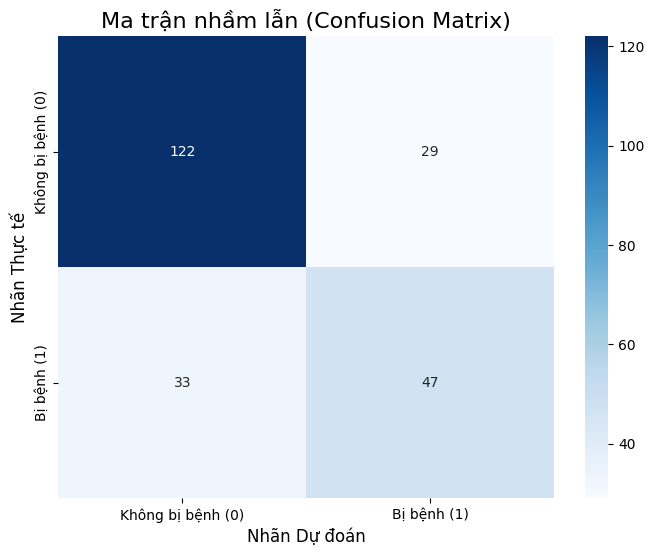

In [ ]:
# --- BƯỚC 1: Tách các đặc trưng (X) và nhãn (y) ---
# Giả sử df_train và df_test đã được làm sạch và có sẵn trong môi trường của bạn.

feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
target_col = 'Outcome'

# Dữ liệu huấn luyện
X_train = df_train[feature_cols]
y_train = df_train[target_col]

# Dữ liệu kiểm tra
X_test = df_test[feature_cols]
y_test = df_test[target_col]


# --- BƯỚC 2: Huấn luyện mô hình ---
# Sử dụng Hồi quy Logistic làm ví dụ
model = LogisticRegression(max_iter=1000) # Tăng max_iter để đảm bảo mô hình hội tụ
model.fit(X_train, y_train)


# --- BƯỚC 3: Dự đoán trên tập Test ---
y_pred = model.predict(X_test)


# --- BƯỚC 4: Tạo và trực quan hóa Ma trận nhầm lẫn ---
cm = confusion_matrix(y_test, y_pred)

# Đặt nhãn cho các trục để biểu đồ dễ đọc hơn
target_names = ['Không bị bệnh (0)', 'Bị bệnh (1)']

# Sử dụng Seaborn để vẽ heatmap cho ma trận nhầm lẫn
plt.figure(figsize=(8, 6)) # Tùy chỉnh kích thước biểu đồ
sns.heatmap(cm,
            annot=True,      # Hiển thị số lượng trên từng ô
            fmt='d',         # Định dạng số nguyên
            cmap='Blues',    # Sử dụng bảng màu xanh
            xticklabels=target_names,
            yticklabels=target_names)

plt.title('Ma trận nhầm lẫn (Confusion Matrix)', fontsize=16)
plt.xlabel('Nhãn Dự đoán', fontsize=12)
plt.ylabel('Nhãn Thực tế', fontsize=12)
plt.show()

**Phân tích Chi tiết**

Đối chiếu kết quả từ ma trận nhầm lẫn của bạn với hình ảnh, hiệu suất của mô hình gần giống nhất với Trường hợp C: Độ chính xác cao, Độ chuẩn xác thấp (High Accuracy, Low Precision).

Dự đoán đúng (Đường chéo chính):

True Negative (TN) = 122: Mô hình đã dự đoán chính xác 122 người không bị bệnh. Đây là điểm mạnh nhất của mô hình.

True Positive (TP) = 47: Mô hình chỉ dự đoán chính xác được 47 người bị bệnh.

Dự đoán sai (Đường chéo phụ):

False Positive (FP) = 29: Có 29 người khỏe mạnh nhưng bị mô hình chẩn đoán sai là "bị bệnh". Đây là lỗi "báo động giả".

False Negative (FN) = 33: Có 33 người thực sự bị bệnh nhưng mô hình lại kết luận là "không bị bệnh". Đây là loại lỗi nguy hiểm nhất trong bối cảnh y tế, vì nó bỏ sót bệnh nhân cần được điều trị.

1. High Accuracy (Độ chính xác cao - Vị trí các phát bắn) 🎯
Accuracy đo lường mức độ đúng đắn tổng thể của mô hình.

Tổng số dự đoán của bạn: 122 + 29 + 33 + 47 = 231

Số dự đoán đúng: 122 (đúng là không bệnh) + 47 (đúng là có bệnh) = 169

Accuracy = 169 / 231 ≈ 73%

✅ Mức 73% được coi là khá cao. Giống như trong hình C, các phát bắn của bạn được phân bổ xung quanh tâm mục tiêu, có nghĩa là tổng thể mô hình dự đoán đúng nhiều hơn sai.

2. Low Precision (Độ chuẩn xác thấp - Mức độ phân tán của các phát bắn) scatter
Precision đo lường sự nhất quán khi mô hình đưa ra một dự đoán cụ thể. Trong trường hợp này, hãy xem xét khi mô hình dự đoán "Bị bệnh":

Khi mô hình "bắn" vào mục tiêu "Bị bệnh", nó không bắn thành một cụm gọn gàng. Các phát bắn bị phân tán:

47 lần trúng tâm (TP): Dự đoán đúng là "Bị bệnh".

29 lần trượt ra ngoài (FP): Dự đoán sai là "Bị bệnh" trong khi người đó khỏe mạnh.

Thêm vào đó, mô hình còn bỏ lỡ hoàn toàn 33 trường hợp "Bị bệnh" (FN), bắn trượt hẳn sang vùng "Không bị bệnh".

## **8. Trực quan hóa dữ liệu**

### **(1) Trực quan hóa dữ liệu với thư viện Matplotlib**

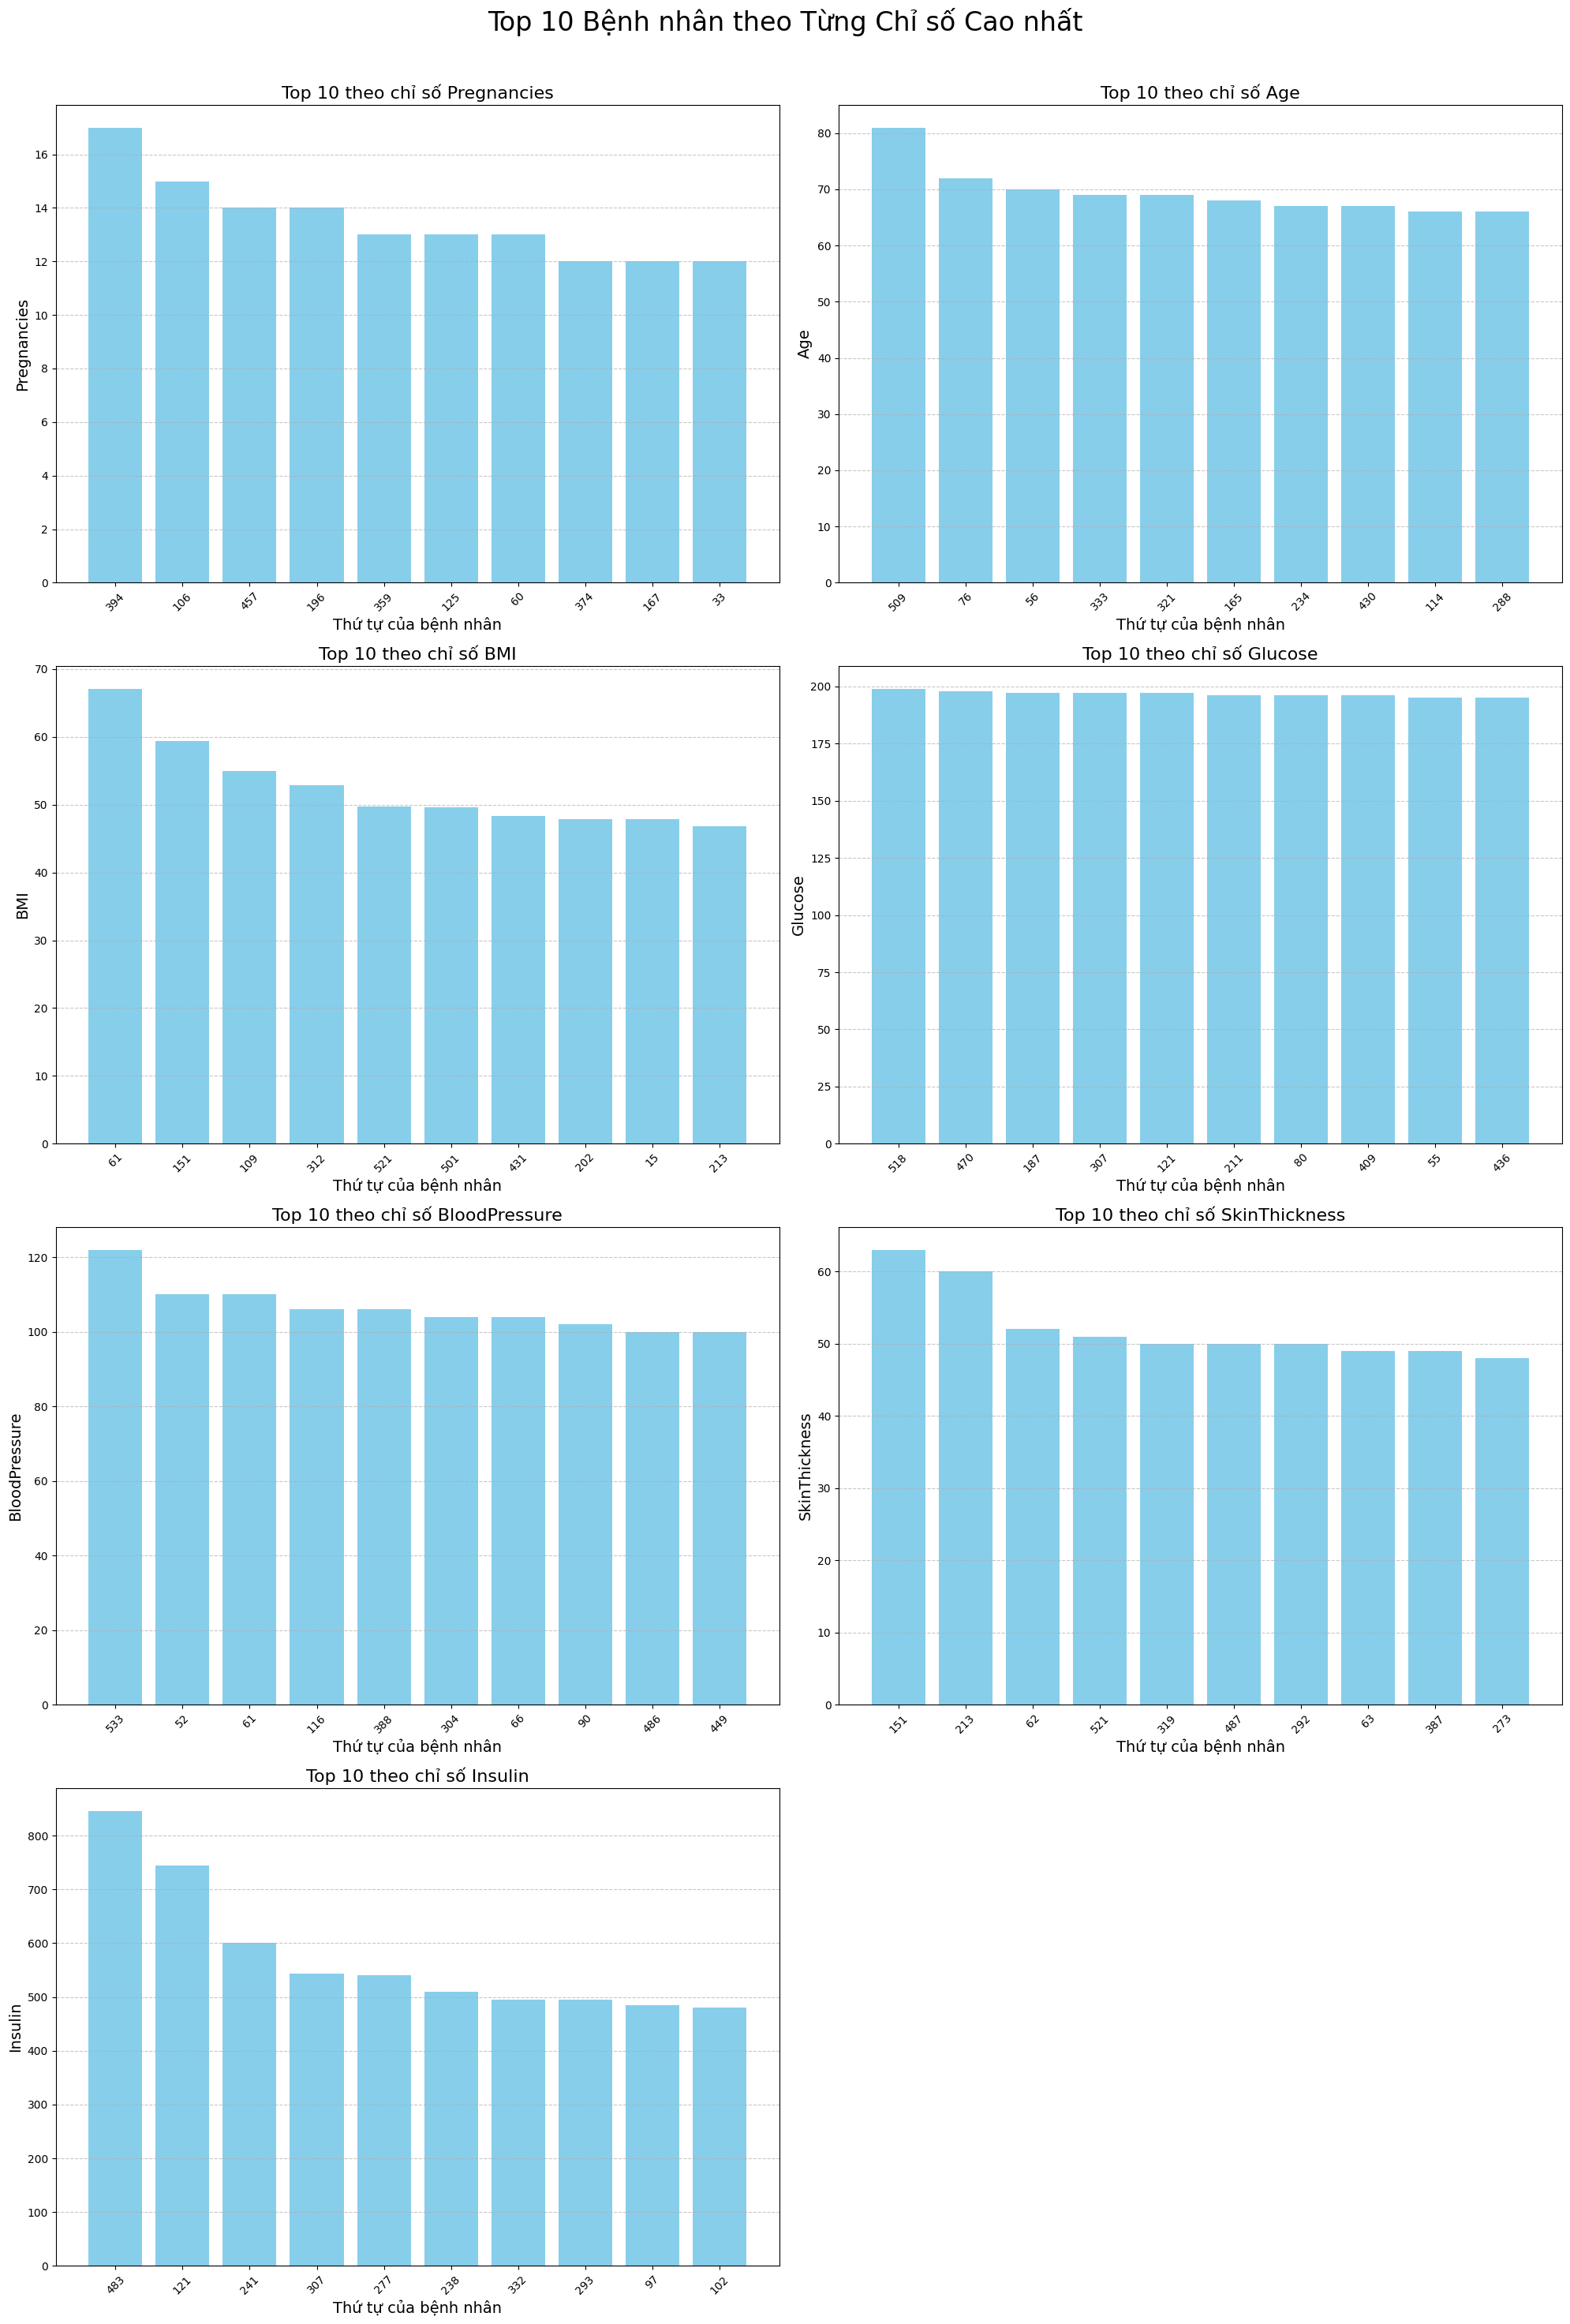

In [ ]:

# Danh sách các cột cần vẽ và tiêu đề tương ứng
columns_to_plot = [
    'Pregnancies', 'Age', 'BMI', 'Glucose',
    'BloodPressure', 'SkinThickness', 'Insulin'
]

# Tạo một lưới biểu đồ đủ lớn, ví dụ 4 hàng, 2 cột
fig, axes = plt.subplots(4, 2, figsize=(20, 30))
fig.suptitle('Top 10 Bệnh nhân theo Từng Chỉ số Cao nhất', fontsize=24)

# Dùng .ravel() để làm phẳng mảng axes, giúp dễ lặp qua
axes = axes.ravel()

# Vòng lặp để vẽ từng biểu đồ
for i, col_name in enumerate(columns_to_plot):
    # 1. Sắp xếp theo đúng cột hiện tại
    df_sorted = df_train.sort_values(col_name, ascending=False)

    # 2. Lấy dữ liệu top 10
    x = df_sorted.index[:10].astype(str)
    y = df_sorted[col_name][:10]

    # 3. Vẽ biểu đồ vào đúng ô `axes[i]`
    axes[i].bar(x, y, color='skyblue')
    axes[i].set_title(f'Top 10 theo chỉ số {col_name}', fontsize=16)
    axes[i].set_ylabel(col_name, fontsize=14)
    axes[i].set_xlabel('Thứ tự của bệnh nhân', fontsize=14)
    axes[i].tick_params(axis='x', labelsize=10, rotation=45)
    axes[i].tick_params(axis='y', labelsize=10)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Ẩn các ô axes không sử dụng (nếu có)
for i in range(len(columns_to_plot), len(axes)):
    axes[i].set_visible(False)

# Tự động điều chỉnh khoảng cách
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

**Phân tích chi tiết từng biểu đồ**

Pregnancies (Số lần mang thai):

Nhận xét: Có những bệnh nhân với số lần mang thai rất cao, lên tới 17 lần. Đây là những con số đáng chú ý, vì mang thai nhiều lần cũng là một yếu tố có thể ảnh hưởng đến nguy cơ mắc bệnh tiểu đường.

Age (Tuổi):

Nhận xét: Các bệnh nhân lớn tuổi nhất trong bộ dữ liệu nằm trong khoảng từ 69 đến 81 tuổi. Điều này cho thấy bộ dữ liệu bao gồm cả những người cao tuổi, là nhóm có nguy cơ mắc bệnh tiểu đường cao.

BMI (Chỉ số khối cơ thể):

Nhận xét: Biểu đồ này đặc biệt đáng báo động. Có những bệnh nhân với chỉ số BMI rất cao, gần chạm ngưỡng 70. Theo tiêu chuẩn y tế, BMI trên 30 đã được coi là béo phì, vì vậy những giá trị này cho thấy tình trạng béo phì nghiêm trọng, một trong những yếu tố nguy cơ lớn nhất của bệnh tiểu đường tuýp 2.

Glucose (Nồng độ đường huyết):

Nhận xét: Top 10 bệnh nhân đều có mức glucose rất cao, xấp xỉ 200 mg/dL. Mức glucose lúc đói bình thường là dưới 100 mg/dL. Các giá trị này đều nằm trong ngưỡng chẩn đoán bệnh tiểu đường, cho thấy đây là những trường hợp có tình trạng tăng đường huyết rõ rệt.

BloodPressure (Huyết áp):

Nhận xét: Các giá trị huyết áp cao nhất lên tới 122 mmHg (có thể là huyết áp tâm trương). Đây là mức huyết áp cao, cho thấy sự tồn tại của bệnh cao huyết áp trong nhóm bệnh nhân này, một bệnh thường đi kèm với tiểu đường.

SkinThickness (Độ dày nếp gấp da):

Nhận xét: Tương tự BMI, các giá trị cao nhất của độ dày nếp gấp da cho thấy lượng mỡ dưới da lớn, một chỉ số khác liên quan đến tình trạng thừa cân, béo phì.

Insulin:

Nhận xét: Biểu đồ này cho thấy sự chênh lệch rất lớn. Bệnh nhân có chỉ số insulin cao nhất vượt xa những người còn lại (trên 800 µU/mL). Mức insulin cao bất thường như vậy thường là dấu hiệu của tình trạng kháng insulin nghiêm trọng, cơ thể phải sản xuất một lượng lớn insulin để cố gắng kiểm soát đường huyết nhưng không hiệu quả.